In [ ]:
from itertools import combinations
from singularite import group, isJStrict

def conj(n, xs):
    return all(isJStrict(h, t) for (h, *t) in combinations((n, *xs), 2))

for n in range(2, 100):
    xss = combinations(group(n), 3)
    for xs in xss:
        if isJStrict(n, xs):
            assert conj(n, xs)


True


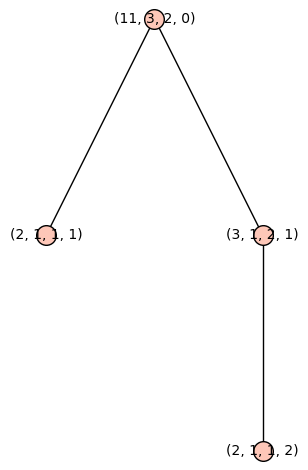

In [8]:
from singularite import eclatements, coprime, group
from itertools import combinations

def g(n, xs):
    d = dict()
    stack = [(n, xs)]
    while len(stack) > 0:
        ni, bs = stack.pop()
        if not coprime(ni, *bs):
            return False
        if set(bs) != {1}:  # not lisse
            d[(ni, bs)] = [(mi, ci) for (mi, ci) in eclatements(ni, bs)]
            for cs in eclatements(ni, bs):
                stack.append(cs)
    return DiGraph(d)


def t(n, xs, d=0):
    children = [t(ni, bi, d + 1) for (ni, bi) in eclatements(n, xs)]
    return LabelledOrderedTree(children, label = (n, *xs, d))

print(isJStrict(11, (3, 2)))
show(t(11, (3, 2)).plot())

False


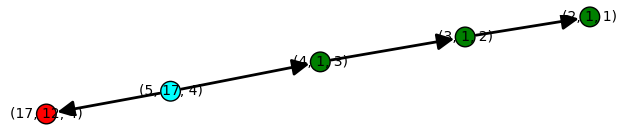

In [19]:
from singularite import eclatements, pairwise_coprime, isJStrict


def ok(n, xs):
    if all(x <= 1 for x in xs):
        return True
    return pairwise_coprime((n, *xs))


def T(n, xs):
    children, bad = [], set()
    if ok(n, xs):
        for (ni, xi) in eclatements(n, xs):
            subt, subs = T(ni, xi)
            children.append(subt)
            bad |= subs
    else:
        bad |= {(n, *xs)}
    return (LabelledOrderedTree(children, label=(n, *xs)), bad)


n, r = 5, (17, 4)
print(isJStrict(n, r))
t, b = T(n, r)
if len(b) == 0:
    view(t)
else:
    show(t.as_digraph().plot(vertex_color='green', vertex_colors={'red': b, 'cyan': {(n, *r)}}))

In [ ]:
a, b = 1, 1

for _ in range(10):
    a, b = b, a + b
    print(a, b, a + b, isJStrict(a + b, (a, b)))

In [18]:

def choix(n, xs):
    bs = [xs[0]]
    for i in range(1, len(xs)):
        bs.append(crt([xs[i]] + i*[1], [n] + bs))
    return bs

print(choix(5, [4,2]))

[4, 17]


In [33]:
l = LabelledBinaryTree([], label='(-n, b)_a')
r = LabelledBinaryTree([], label='(a, -n)_b')
p = LabelledBinaryTree([l, r], label='(a, b)_n')
view(p)

l = LabelledOrderedTree([], label='(-n)_a')
p = LabelledOrderedTree([l], label='(a)_n')
view(p)